In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

## Data Evaluation

In [24]:
#Read the split Dataset 
X_train = pd.read_csv('../../data/X_train.csv', index_col = 0)
y_train = pd.read_csv('../../data/y_train.csv', index_col = 0)
X_test = pd.read_csv('../../data/X_test.csv', index_col = 0)
y_test = pd.read_csv('../../data/y_test.csv', index_col = 0)
housing_df = pd.read_csv('../../data/final_data.csv', index_col = 0)

In [25]:
housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,yr_built,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7,1180,...,1955,0.0,1340,5650,"[47.5112, -122.257]",3.000000,4.788136,0.880597,393.333333,medium
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7,2170,...,1951,1991.0,1690,7639,"[47.721, -122.319]",1.333333,2.817899,1.520710,856.666667,medium
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6,770,...,1933,0.0,2720,8062,"[47.7379, -122.233]",2.000000,12.987013,0.283088,385.000000,low
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7,1050,...,1965,0.0,1360,5000,"[47.5208, -122.393]",1.333333,2.551020,1.441176,490.000000,medium
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8,1680,...,1987,0.0,1800,7503,"[47.6168, -122.045]",1.500000,4.809524,0.933333,560.000000,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,Average,8,1530,...,2009,0.0,1530,1509,"[47.6993, -122.346]",1.200000,0.739216,1.000000,510.000000,medium
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,Average,8,2310,...,2014,0.0,1830,7200,"[47.5107, -122.362]",1.600000,2.516450,1.262295,577.500000,medium
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,Average,7,1020,...,2009,0.0,1020,2007,"[47.5944, -122.299]",2.666667,1.323529,1.000000,510.000000,medium
21595,291310100,400000.0,3,2.50,1600,2388,2.0,Average,8,1600,...,2004,0.0,1410,1287,"[47.5345, -122.069]",1.200000,1.492500,1.134752,533.333333,medium


In [26]:
#get the shape of the df
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16197, 20), (5400, 20), (16197, 1), (5400, 1))

In [27]:
X_train.index == y_train.index

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
X_test.index == y_test.index

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
print("X_train:")
display(X_train.describe())
print("X_test:")
display(X_test.describe())

X_train:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,4.596556e+09,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,7.658702,1790.467926,287.657159,1971.019942,67.419522,1987.809286,12784.065074,1.750182,7.326601,1.053928,619.321692
std,2.888074e+09,0.905951,0.768049,918.209756,4.077585e+04,0.540474,1.169277,827.598600,440.726697,29.325399,360.641442,685.189105,26833.379871,0.653123,19.599984,0.319392,216.114350
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.400000,0.214876,0.248344,200.000000
25%,2.122049e+09,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,1.333333,2.447619,0.883495,470.000000
50%,3.905082e+09,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,1.600000,4.037186,1.000000,577.500000
75%,7.338403e+09,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,2360.000000,10086.000000,2.000000,6.405229,1.161383,725.000000
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,8.000000,1270.276154,6.000000,3000.000000


X_test:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,4.532239e+09,3.376111,2.114028,2070.210185,1.518194e+04,1.492130,7.655556,1782.984630,279.895926,1970.938889,72.773519,1983.054074,12680.953148,1.757062,7.746582,1.050794,614.627266
std,2.842176e+09,0.984894,0.771851,917.805949,4.327026e+04,0.537347,1.184994,828.294279,437.077406,29.526848,374.044172,685.405621,28558.979278,0.694639,30.014194,0.323071,215.233484
min,1.000102e+06,1.000000,0.750000,410.000000,6.090000e+02,1.000000,4.000000,410.000000,0.000000,1900.000000,0.000000,670.000000,659.000000,0.444444,0.246559,0.187279,49.090909
25%,2.130627e+09,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1480.000000,5100.000000,1.333333,2.479164,0.874564,470.000000
50%,3.880401e+09,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,7.000000,1550.000000,0.000000,1975.000000,0.000000,1830.000000,7619.500000,1.600000,4.045049,1.000000,572.500000
75%,7.229926e+09,4.000000,2.500000,2520.000000,1.058800e+04,2.000000,8.000000,2200.000000,530.000000,1997.000000,0.000000,2370.000000,10080.000000,2.000000,6.306019,1.159822,715.000000
max,9.842300e+09,33.000000,7.750000,10040.000000,1.164794e+06,3.000000,13.000000,8860.000000,3260.000000,2015.000000,2015.000000,5790.000000,858132.000000,18.857143,1640.554930,5.101562,3420.000000


In [33]:
print("y_train:")
display(y_train.describe())
print("y_test:")
display(y_test.describe())

y_train:


,price
count,1.619700e+04
mean,5.412845e+05
std,3.663447e+05
min,7.800000e+04
25%,3.235000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


y_test:


,price
count,5.400000e+03
mean,5.373335e+05
std,3.704391e+05
min,8.300000e+04
25%,3.200000e+05
50%,4.500000e+05
75%,6.400000e+05
max,7.060000e+06


In [62]:
#creating a traindf and test df
train_df = pd.concat([X_train,y_train], axis =1)
test_df = pd.concat([X_test,y_test], axis = 1)


In [63]:
print("train_df:")
display(train_df)
print("test_df:")
display(test_df)

train_df:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
6405,3905080280,3,2.50,1880,4499,2.0,Average,8,1880,0.0,...,0.0,2130,5114,"[47.5664, -121.999]",1.200000,2.393085,0.882629,626.666667,medium,529000.0
937,5466420030,3,2.50,2020,6564,1.0,Average,7,1310,710.0,...,0.0,1710,5151,"[47.3545, -122.158]",1.200000,3.249505,1.181287,673.333333,medium,253000.0
19076,2623069010,5,4.00,4720,493534,2.0,Very Good,9,3960,760.0,...,0.0,2160,219542,"[47.4536, -122.009]",1.250000,104.562288,2.185185,944.000000,medium,745000.0
15201,4443800545,2,2.00,1430,3880,1.0,Good,7,1430,0.0,...,0.0,1430,3880,"[47.6844, -122.392]",1.000000,2.713287,1.000000,715.000000,medium,545000.0
13083,9485930120,3,2.25,2270,32112,1.0,Good,8,1740,530.0,...,0.0,2310,41606,"[47.3451, -122.094]",1.333333,14.146256,0.982684,756.666667,medium,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,3,2.50,2230,5800,2.0,Average,7,2230,0.0,...,0.0,2230,6088,"[47.5308, -121.847]",1.200000,2.600897,1.000000,743.333333,medium,440000.0
21575,4140940150,4,2.75,2770,3852,2.0,Average,8,2770,0.0,...,0.0,1810,5641,"[47.5001, -122.232]",1.454545,1.390614,1.530387,692.500000,medium,572000.0
5390,8658300480,4,1.50,1530,9000,1.0,Good,6,1530,0.0,...,0.0,1520,8500,"[47.6492, -121.908]",2.666667,5.882353,1.006579,382.500000,low,299800.0
860,1723049033,1,0.75,380,15000,1.0,Average,5,380,0.0,...,0.0,1170,15000,"[47.481, -122.323]",1.333333,39.473684,0.324786,380.000000,low,245000.0


test_df:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
3686,6303401050,3,0.75,850,8573,1.0,Average,6,600,250.0,...,0.0,850,8382,"[47.503, -122.356]",4.000000,10.085882,1.000000,283.333333,low,132500.0
10247,1995200200,3,1.00,1510,6083,1.0,Good,6,860,650.0,...,0.0,1510,5712,"[47.6966, -122.324]",3.000000,4.028477,1.000000,503.333333,low,415000.0
4037,1423089118,4,2.25,1790,42000,1.0,Average,7,1170,620.0,...,0.0,2060,50094,"[47.4819, -121.744]",1.777778,23.463687,0.868932,447.500000,medium,494000.0
3437,9349900110,2,1.50,1140,2500,1.0,Average,7,630,510.0,...,0.0,1500,5000,"[47.5707, -122.359]",1.333333,2.192982,0.760000,570.000000,medium,355000.0
19291,455000395,3,1.00,1500,3920,1.0,Average,7,1000,500.0,...,0.0,1640,4017,"[47.6718, -122.359]",3.000000,2.613333,0.914634,500.000000,medium,606000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,6381500265,5,1.00,1170,6757,1.0,Good,6,800,370.0,...,0.0,1590,6794,"[47.7332, -122.304]",5.000000,5.775214,0.735849,234.000000,low,397000.0
15003,1250202115,3,1.75,1670,5100,1.0,Very Good,7,990,680.0,...,0.0,2140,4452,"[47.5898, -122.291]",1.714286,3.053892,0.780374,556.666667,medium,615000.0
13478,1336800065,4,2.25,3260,4640,2.0,Very Good,9,2360,900.0,...,0.0,3240,5800,"[47.6272, -122.312]",1.777778,1.423313,1.006173,815.000000,medium,1330000.0
18399,5469650040,4,5.00,5820,13906,2.0,Average,11,3750,2070.0,...,0.0,2980,13000,"[47.3814, -122.164]",0.800000,2.389347,1.953020,1455.000000,high,784500.0


In [37]:
train_df = train_df.drop('id',  axis =1)
test_df = test_df.drop('id', axis = 1)

In [65]:
columns = train_df.columns
columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'coordinates',
       'bedrooms_bathrooms', 'sqft_lot_sqft_living',
       'sqft_living_sqft_living15', 'sqft_living_bedrooms', 'grade_category',
       'price'],
      dtype='object')

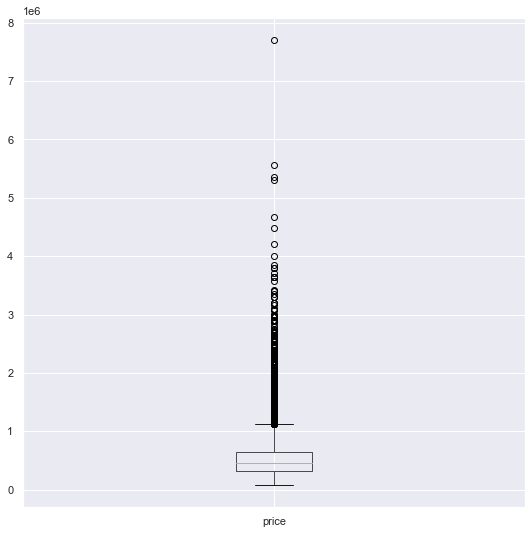

In [66]:
#Checking for outliers
plt.figure(figsize = (9,9))
train_df.boxplot(column = 'price')
plt.show()

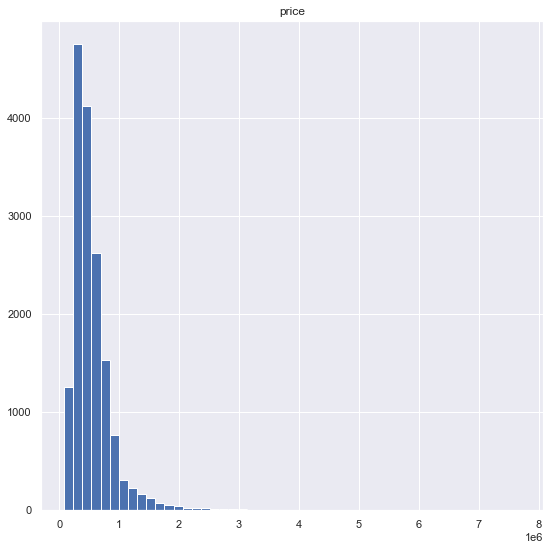

In [67]:
train_df.hist(column='price', bins = 50, figsize=(9,9))
plt.show()

The price distribution is positively skewed data, we can also see alot of outliers as expected. meaning that there isa wide price range.

# Baseline Model

In [68]:
train_target_mean = y_train.mean()
train_target_mean

price    541284.461567
dtype: float64

In [58]:
#Import r2_score from metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Calculating the predictions for the Train and Test df using the mean multiply by the length

baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)


print("Rsquared:")

print(f"Train R2: {r2_score(y_train,baseline_train_preds)}")
print(f"Validation R2: {r2_score(y_test,baseline_test_preds)}")

print("-----")

print("Root Mean squared Error:")

print(f"Train RMSE: {mean_squared_error(y_train,baseline_train_preds,squared = False)}")
print(f"Validation RMSE: {mean_squared_error(y_test,baseline_test_preds, squared = False)}")

print("-----")

print(" Mean absolute Error:")

print(f"Train RMSE: {mean_absolute_error(y_train,baseline_train_preds)}")
print(f"Validation RMSE: {mean_absolute_error(y_test,baseline_test_preds)}")



Rsquared:
Train R2: 0.0
Validation R2: -0.0001137788699303588
-----
Root Mean squared Error:
Train RMSE: 366333.4407520335
Validation RMSE: 370425.86427991075
-----
 Mean absolute Error:
Train RMSE: 234722.6336006717
Validation RMSE: 233000.83610469702


Result Summary:
- The R2 of the baseline is relatively low. It means that we still need to engineer all the feature to get a better result for our model.

    



# Simple Model

<AxesSubplot:>

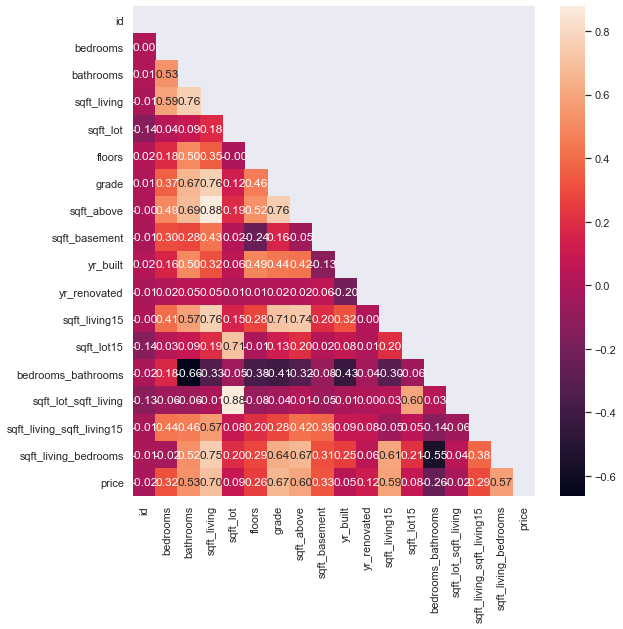

In [69]:
plt.figure(figsize = (9,9))
sns.heatmap(train_df.corr(),mask =np.triu(np.ones_like(train_df.corr(),
                                                       dtype = bool)), annot = True, fmt='.2f')

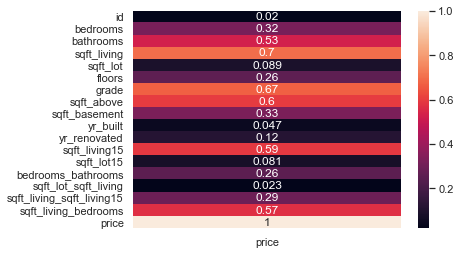

In [70]:
#Using the heatmap to view the feature that correlate with the target.
sns.heatmap(abs(train_df.corr())[['price']], annot = True);



In [50]:
corr_cols = ['price', 'sqft_living','grade', 'sqft_living_bedrooms', 'bathrooms', 'sqft_living15','sqft_above']
corr_cols

['price',
 'sqft_living',
 'grade',
 'sqft_living_bedrooms',
 'bathrooms',
 'sqft_living15',
 'sqft_above']

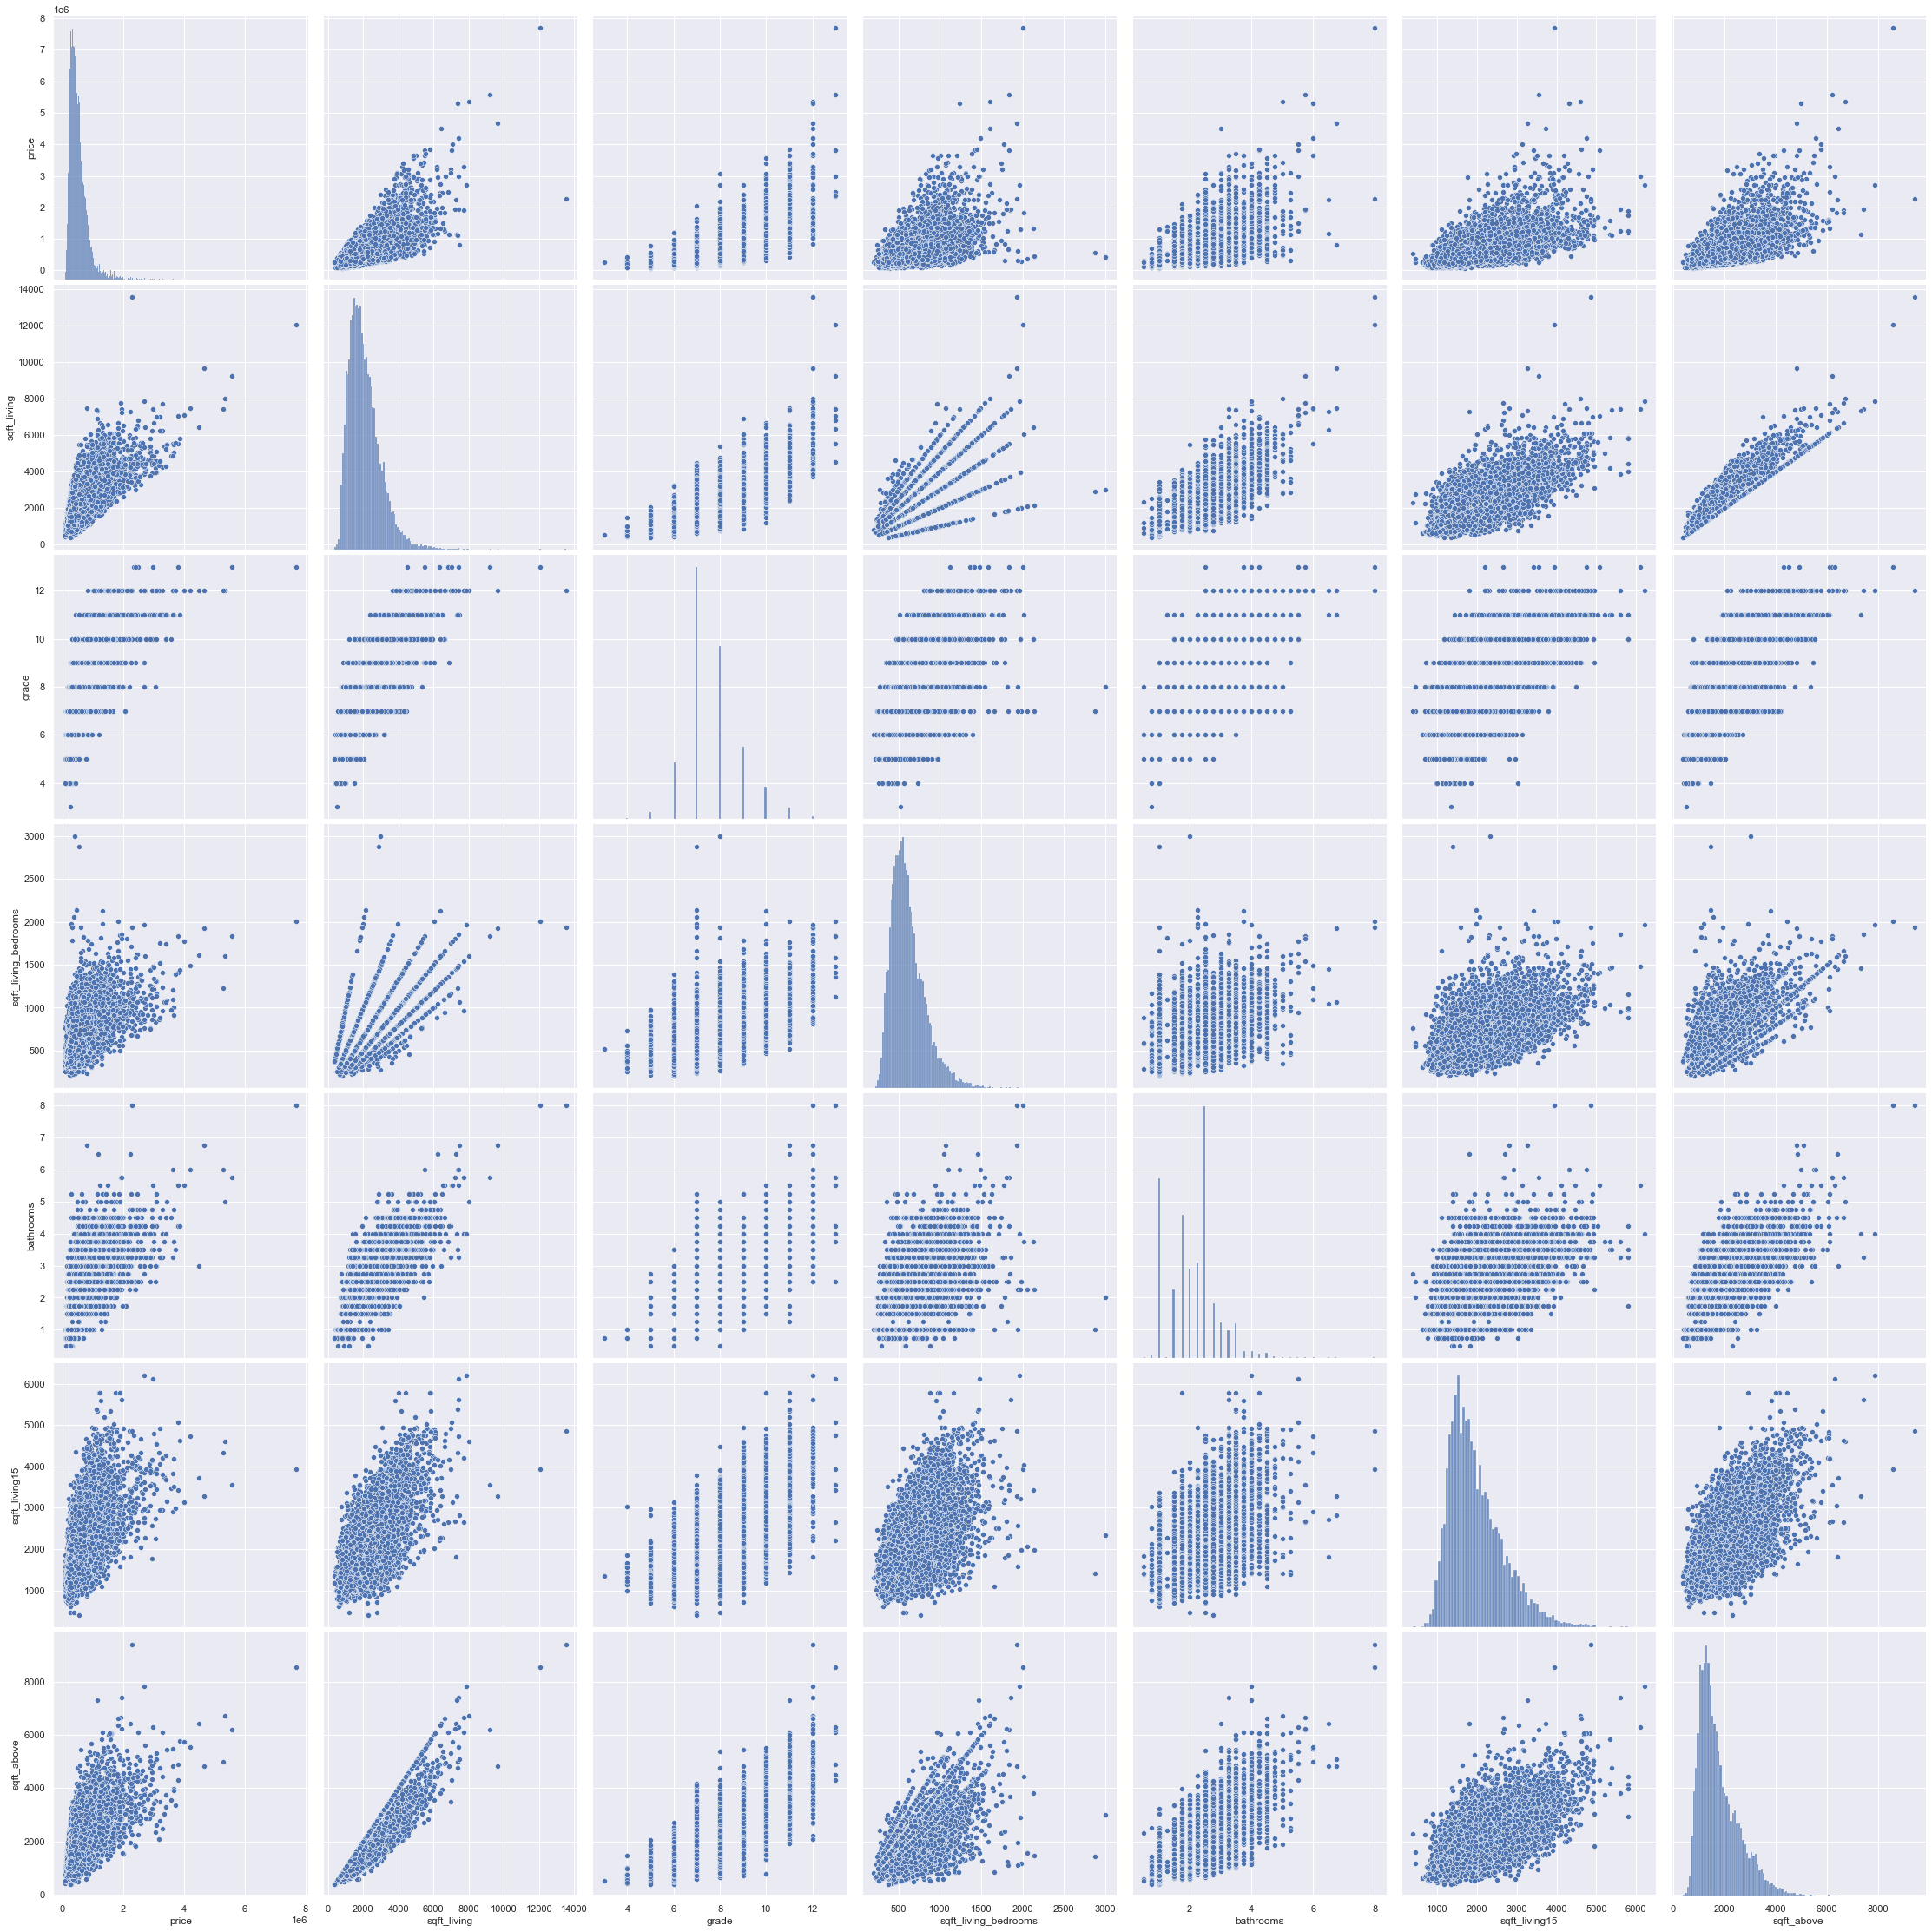

In [51]:
sns.set()
sns.pairplot(train_df[corr_cols], size = 4.5 )

The correlation pairplots confirms the findings of the heatmap. There is significant correlation between the Price,  sqft_living, grade, sqft_living_bedrooms, bathrooms, sqft_living15, and sqft_above. which gives us the opportunity to combine features so we can determine a better r2 for our model.

In [46]:
#get the formula
formula = 'price ~ sqft_living'
#using stats model ols
model_train = ols(formula = formula, data = train_df).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:24:42   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
test_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
3686,6303401050,3,0.75,850,8573,1.0,Average,6,600,250.0,...,0.0,850,8382,"[47.503, -122.356]",4.000000,10.085882,1.000000,283.333333,low,132500.0
10247,1995200200,3,1.00,1510,6083,1.0,Good,6,860,650.0,...,0.0,1510,5712,"[47.6966, -122.324]",3.000000,4.028477,1.000000,503.333333,low,415000.0
4037,1423089118,4,2.25,1790,42000,1.0,Average,7,1170,620.0,...,0.0,2060,50094,"[47.4819, -121.744]",1.777778,23.463687,0.868932,447.500000,medium,494000.0
3437,9349900110,2,1.50,1140,2500,1.0,Average,7,630,510.0,...,0.0,1500,5000,"[47.5707, -122.359]",1.333333,2.192982,0.760000,570.000000,medium,355000.0
19291,455000395,3,1.00,1500,3920,1.0,Average,7,1000,500.0,...,0.0,1640,4017,"[47.6718, -122.359]",3.000000,2.613333,0.914634,500.000000,medium,606000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,6381500265,5,1.00,1170,6757,1.0,Good,6,800,370.0,...,0.0,1590,6794,"[47.7332, -122.304]",5.000000,5.775214,0.735849,234.000000,low,397000.0
15003,1250202115,3,1.75,1670,5100,1.0,Very Good,7,990,680.0,...,0.0,2140,4452,"[47.5898, -122.291]",1.714286,3.053892,0.780374,556.666667,medium,615000.0
13478,1336800065,4,2.25,3260,4640,2.0,Very Good,9,2360,900.0,...,0.0,3240,5800,"[47.6272, -122.312]",1.777778,1.423313,1.006173,815.000000,medium,1330000.0
18399,5469650040,4,5.00,5820,13906,2.0,Average,11,3750,2070.0,...,0.0,2980,13000,"[47.3814, -122.164]",0.800000,2.389347,1.953020,1455.000000,high,784500.0


In [72]:
model_train = ols(formula = formula, data = train_df).fit()
model_test = ols(formula = formula, data = test_df).fit()

In [ ]:
sm_train_preds = sm.predict(formula=formula, data= model_train)
sm_test_preds = sm.predict(formula=formula, data= model_test)

In [ ]:
# #Import r2_score from metrics
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

# #Calculating the predictions for the Train and Test df using the mean multiply by the length

# baseline_train_preds = [train_target_mean] * len(y_train)
# baseline_test_preds = [train_target_mean] * len(y_test)

# #print the result
# print("Rsquared:")

# print(f"Train R2: {r2_score(y_train,baseline_train_preds)}")
# print(f"Validation R2: {r2_score(y_test,baseline_test_preds)}")

# print("-----")

# print("Root Mean squared Error:")

# print(f"Train RMSE: {mean_squared_error(y_train,baseline_train_preds,squared = False)}")
# print(f"Validation RMSE: {mean_squared_error(y_test,baseline_test_preds, squared = False)}")


In [94]:
# features_X_train = list(X_train.columns)
# features_X_test = list(X_test.columns)
# target = 'price'

In [ ]:
# def evaluate (model, data, features:str, target: str)
# """
# definition
# parameters
# Returns
# """
# formula = "target +  ~  + features"
# model = ols(formula, data).fit
# print(f"{model.summary()}\n")})

# #sns.displot()
# #qqplot

#     if return_model:
#         return model

In [ ]:
def evaluate (y_train, train_preds, y_test, test_preds):
    """
    Evaluate the amount of error between my model's predictions and actiual values for both a train and a test set
    
    Parameters:
    y_train - array like, actual values for 'price' 
    train_preds - array like predicted values for 'price'
    y_test -array like actual values for 'price'
    test_preds - array like predicted values for 'price'
    returns:
    None
    """
    print("Rsquared:")

    print(f"Train R2: {r2_score(y_train,baseline_train_preds)}")
    print(f"Validation R2: {r2_score(y_test,baseline_test_preds)}")

    print("-----")

    print("Root Mean squared Error:")

    print(f"Train RMSE: {mean_squared_error(y_train,baseline_train_preds,squared = False)}")
    print(f"Validation RMSE: {mean_squared_error(y_test,baseline_test_preds, squared = False)}")

    print("-----")

    print(" Mean absolute Error:")

    print(f"Train RMSE: {mean_absolute_error(y_train,baseline_train_preds)}")
    print(f"Validation RMSE: {mean_absolute_error(y_test,baseline_test_preds)}")
